In [31]:
import os
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns
df = pd.read_csv('avocado.csv')


Great Dataset produced by the creator provides variety of option for producing good graphs

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Let's check now do we have any missing data in our dataset or not

In [33]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

forutnately, we don't have any missing values, so it is great for us

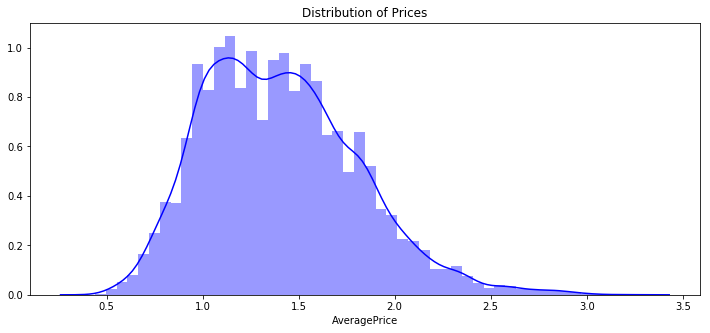

In [34]:
pl.figure(figsize= (12,5))
pl.title('Distribution of Prices')
ax = sns.distplot(df['AveragePrice'], color = 'b')

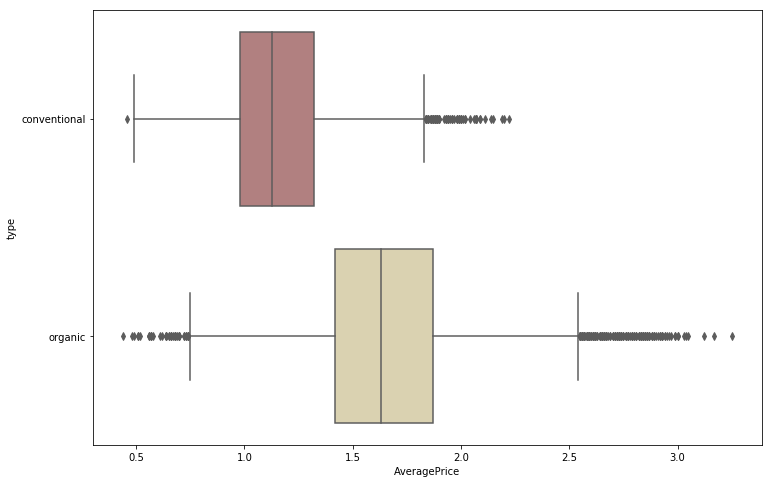

In [38]:
sns.boxplot(y = 'type', x = 'AveragePrice', data = df, palette = 'pink')

As we see from the above boxplot graph that organice Avocado are more expensive than
convetional avocado's this is because we all pay higher for natural pure products
but the price of these two types does not depends only on type it also depends on regions
over the years

C:\Users\qayyu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\qayyu\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


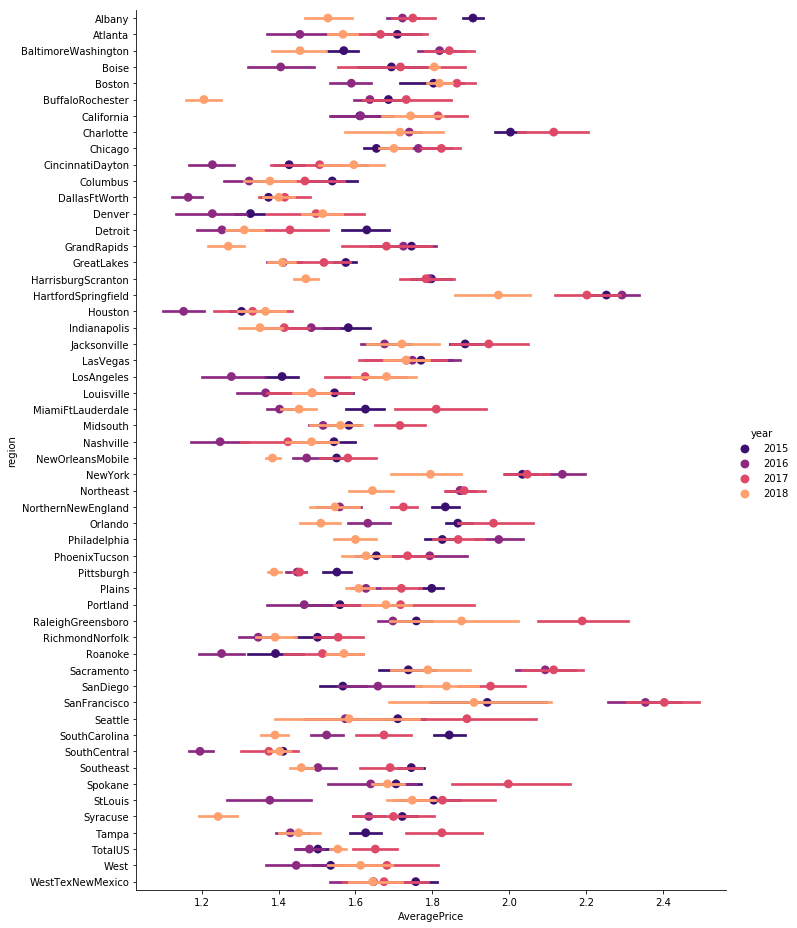

In [41]:
mask = df['type'] == 'organic'
g = sns.factorplot('AveragePrice', 'region', data = df[mask],
                hue = 'year',
                size = 13,
                aspect = 0.8,
                palette= 'magma',
                join = False,
            )

as you can see from the above factor plot that in 2017 in san francisco the price ov organic avocado is very
high that is because in the 2017 there was a shortage of the organice avocado's in san francisco

C:\Users\qayyu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\qayyu\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


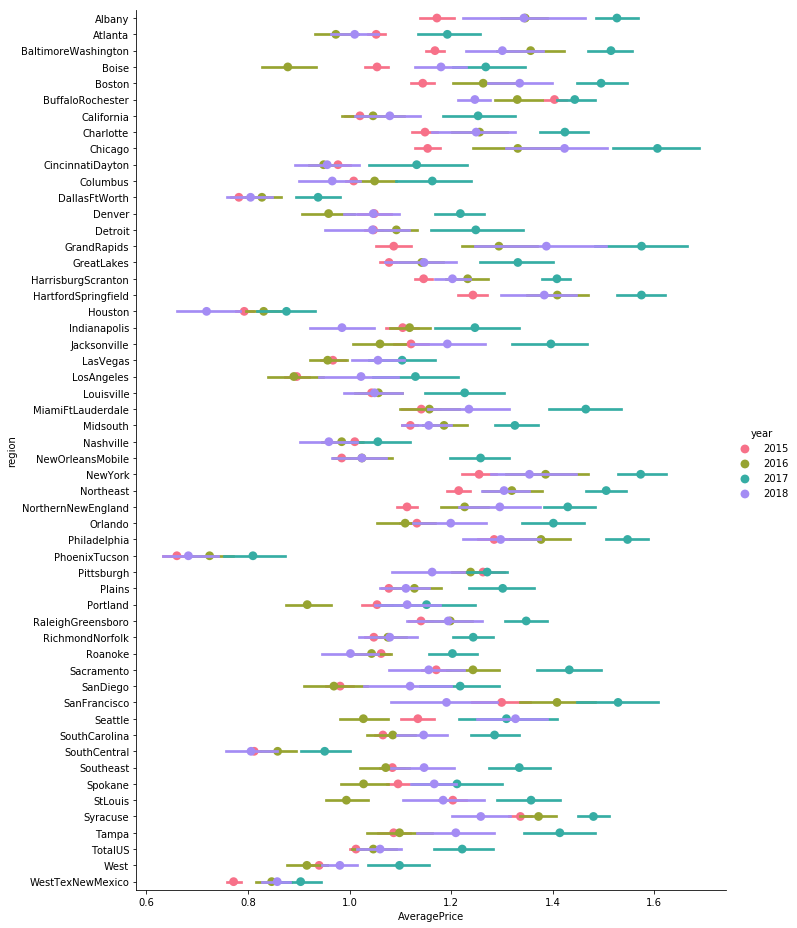

In [50]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='husl',
                   join=False,
              )

as you can see that prices are lower which is obvious but again due to shortage of
organic avocado in 2017 the prices of conventional avocado's are also higher in 2017

Organic avocado type is more expensive. And avocado is generally more expensive with each passing year. Objection! lol. We're explorers. Let's see the correlation between these features. First, let's code the categorical attribute - "type".

In [51]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type) 

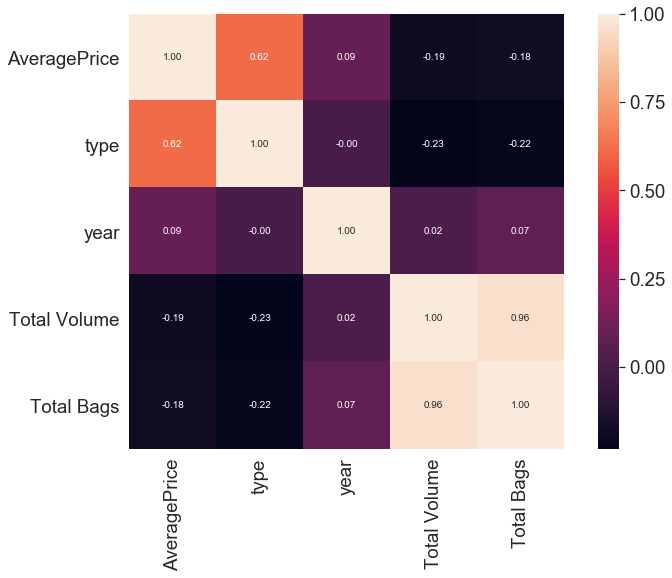

In [61]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True,
                 fmt = '.2f', annot_kws = {'size':10}, yticklabels = cols, 
                 xticklabels = cols)

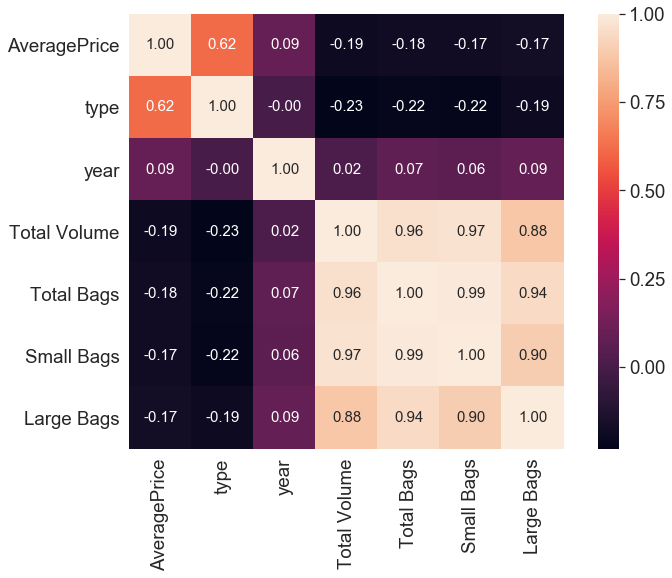

In [62]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags','Small Bags', 'Large Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True,
                 fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, 
                 xticklabels = cols)

The price of avocado is influenced by the type. Logically. We also see a strong correlation between the features: "Total Bags" and "Total Volume". Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag. It is logical but can create problems if we go to predict the price of avocado. I could be wrong, though. I would be grateful to hear the opinion of more experienced people on this issue, thank you!

Until I decided that can be try classified avocado on type. Organic or not? Experiment so experiment!

In [75]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

x = df.drop(['type','region','Date'], axis = 1)
y = df.type

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [76]:
logreg =  LogisticRegression(penalty='l1', tol=0.0001).fit(x_train,y_train)
print("LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

LogisticRegression train data score:0.948
LogisticRegression test data score:0.948


Good result. But the values on the training and test set are about the same, which may indicate that we have understudied the model. Next, I'll try to use cross-validation, but for now let's look at the result of the random forest classifier method :)

RandomForestClassifier train data score:1.000
RandomForestClassifier test data score:0.995


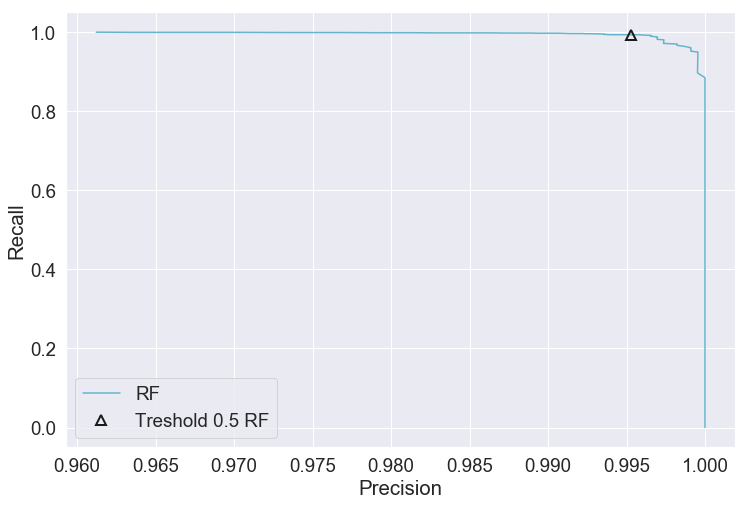

In [77]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
print("RandomForestClassifier train data score:{:.3f}".
     format(rf.score(x_train,y_train)))
print("RandomForestClassifier test data score:{:.3f}".
     format(rf.score(x_test,y_test)))
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

pl.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
pl.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
pl.xlabel("Precision")
pl.ylabel("Recall")
pl.legend(loc = "best")

The curve of recall and precision suggests that this classifier works great! Let's look at the average precision and look at the rock curve.
and also we can see that it's score is far better than Logistic regression both on test data and training data

In [78]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(x_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".
     format(p_rf))

Average precision score Random Forest Classifier: 1.000


In [79]:
p_logreg = average_precision_score(y_test,logreg.predict_proba(x_test)[:,1])
print("Average precision score Logistic Regression: {:.3f}".
     format(p_logreg))

Average precision score Logistic Regression: 0.985


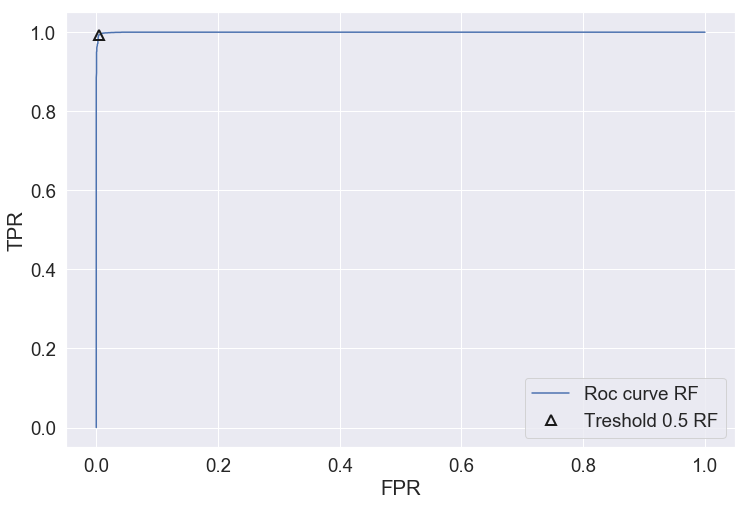

In [80]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
pl.plot(fpr_rf,tpr_rf, label = "Roc curve RF")

pl.xlabel("FPR")
pl.ylabel("TPR")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
pl.plot(fpr_rf[close_default_rf],
        tpr_rf[close_default_rf],'^', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
pl.legend(loc = 4)

Now let's add cross-validation to train the logistic regression model. Well, why not try KNeighborsClassifier too?

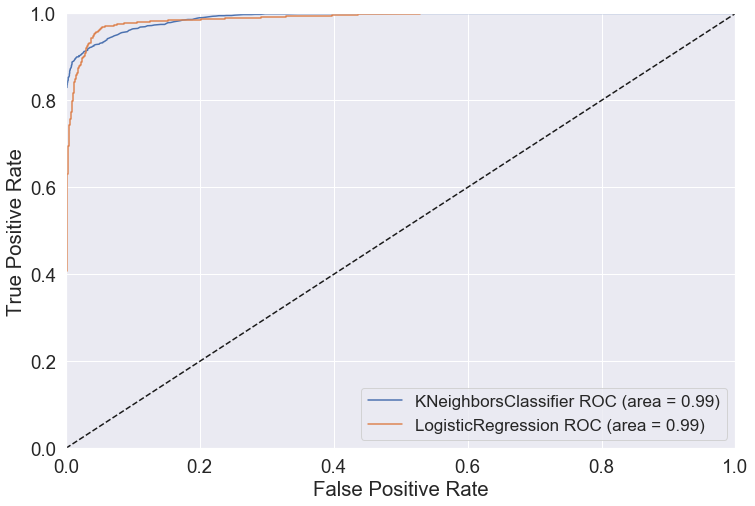

In [83]:
kfold = 7 
result = {} 
trn_train, trn_test, trg_train, trg_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25) 
knn = KNeighborsClassifier(n_neighbors = 200) 
log_reg = LogisticRegression(penalty='l1', tol=0.001) 
scores = sklearn.model_selection.cross_val_score(knn, x, y, cv = kfold)
result['KNeighborsClassifier'] = scores.mean()
scores = sklearn.model_selection.cross_val_score(log_reg, x, y, cv = kfold)
result['LogisticRegression'] = scores.mean()
pl.clf()

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')


I believed in you, logistic regression! The RandomForestClassifier has the highest accuracy. But logistic regression and KNeighborsClassifier will also help to know what type of avocado is in front of us.